Plot and summarize MultiNest samples using getdist over multiple datasets. Based on a script Wahid sent me.

In [2]:
# import anaconda3/personal python libraries
# TODO: maybe there's a cleaner way of doing this?
import sys
sys.path.append('~/anaconda3/lib/python3.6/site-packages/')

In [3]:
import numpy as np
import pandas as pd
import getdist
import getdist.plots as pt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
parameters = ['alpha', 'beta', 
              'rx', 'rc', 'sigma_res', 
              'cstar', 'xstar', 'mstar', 
              #'gc', 'gx', 'gm', 'eps', 
              'omegam', 'w', 'h', 
              'evidence'] # order should match your multinest output

param_plot_limits = {
    'alpha': (.12, .16), 'beta': (2.6, 3.6),
    'omegam': (-.1, 1), 'w': (-4.1, 0), 'h': (.675, .725)
}

param_true_values = {
    'alpha': .14, 'beta': 3.2,
    'rx': 0.0, 'rc': 0.0, 'sigma_res': 0.1,
    'omegam': .3, 'w': -1, 'h': .7,
    'gc': -0.130037024035173, 'gx': 0.031751881393516444, 'gm': -1.168759034509585, 'eps': 26.734531858954547
}

In [5]:
params_of_interest = ['alpha', 'beta',
                      'rx', 'rc', 'sigma_res',
                      #'gc', 'gx', 'gm', 'eps', 
                      'omegam', 'w', 'h']
labels_of_interest = ['\\alpha', '\\beta', 
                      'r_c', 'r_x', '\\sigma_{res}',
                      #'\\gamma_c', '\\gamma_x', '\\gamma_m', '\\epsilon', 
                      '\\Omega_m', 'w', 'h'] # for plotting

# load multinest results

In [12]:
job_id = '2358656'
n_sims = 10

In [17]:
data = []
for i in range(n_sims):
    data_i = pd.read_csv('/c/Users/lucas/Datasets/bahamas/chain_results/{}[{}].cx1/post_equal_weights.dat'.format(job_id, i+1), sep="\s+", header=None)
    #data_i = pd.read_csv('/c/Users/lucas/Datasets/bahamas/chain_results/{}.cx1/post_equal_weights.dat'.format(job_id), sep="\s+", header=None)
    #data_i = pd.read_csv('/c/Users/lucas/Datasets/bahamas/chain_results/{}.cx1/post_equal_weights.dat'.format(job_id), sep="\s+", header=None)
    data_i.columns = parameters
    data.append(data_i[params_of_interest])

# calculate summary statistics

In [18]:
true_values_of_interest = [param_true_values[label] for label in data[0].columns.values]
bias = [data_i.mean() - true_values_of_interest for data_i in data]
var = [data_i.var() for data_i in data]
mse = [var[i] + bias[i]**2 for i in range(n_sims)]

In [19]:
for i in range(n_sims):
    print('Simulation ', i)
    stats = pd.concat([bias[i].rename('bias'), var[i].rename('var'), mse[i].rename('mse')], axis=1)
    print(stats.T)

Simulation  0
         alpha      beta        rx        rc  sigma_res    omegam         w  \
bias  0.068134 -0.178627  0.864010  0.079373   0.211779  0.190208 -2.233413   
var   0.000715  0.069601  0.001333  0.000011   0.000319  0.001386  0.314071   
mse   0.005357  0.101509  0.747846  0.006311   0.045170  0.037565  5.302203   

             h  
bias  0.004972  
var   0.000023  
mse   0.000047  
Simulation  1
         alpha      beta        rx        rc  sigma_res    omegam         w  \
bias  0.068722 -0.183420  0.863695  0.079245   0.211546  0.193210 -2.243974   
var   0.000707  0.065900  0.001313  0.000011   0.000299  0.001403  0.310771   
mse   0.005430  0.099543  0.747282  0.006291   0.045051  0.038733  5.346190   

             h  
bias  0.004914  
var   0.000021  
mse   0.000045  
Simulation  2
         alpha      beta        rx        rc  sigma_res    omegam         w  \
bias  0.068294 -0.189612  0.864629  0.079299   0.212124  0.191951 -2.254034   
var   0.000720  0.068244  0.00

In [20]:
# calculate summary bias and variance
# TODO: do these need to be reweighted?
# TODO: how meaningful are means of each statistic?
mean_bias = pd.concat(bias, axis=1).T.mean().to_frame('mean bias')
var_of_bias = pd.concat(bias, axis=1).T.var().to_frame('var of bias')
mean_var = pd.concat(var, axis=1).T.mean().to_frame('mean var')
mean_mse = pd.concat(mse, axis=1).T.mean().to_frame('mean mse')

In [21]:
summarystats = pd.concat([mean_bias, var_of_bias, mean_var, mean_mse], axis=1)
print(summarystats)
summarystats.to_csv('../{}.csv'.format(job_id))

           mean bias   var of bias  mean var  mean mse
alpha       0.068794  2.583030e-07  0.000715  0.005448
beta       -0.184810  2.143097e-05  0.067405  0.101578
rx          0.864010  1.723508e-07  0.001325  0.747839
rc          0.079316  4.904296e-09  0.000011  0.006302
sigma_res   0.211651  1.080608e-07  0.000306  0.045103
omegam      0.191755  8.093867e-07  0.001392  0.038162
w          -2.245330  9.224736e-05  0.316821  5.358410
h           0.004902  4.903124e-09  0.000022  0.000046


# create posterior corner plot

In [22]:
mcsamples = [getdist.MCSamples(samples=data_i.values, 
                               names=params_of_interest, 
                               labels=labels_of_interest) for data_i in data]

mcsamples.append(getdist.MCSamples(samples=pd.concat(data).values, 
                                   names=params_of_interest, 
                                   labels=labels_of_interest))

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [23]:
# plot settings
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']

contour_args = []
line_args = []
legend_labels = []

for i in range(n_sims):
    contour_args.append({'color': colors[i]})
    line_args.append({'lw': .75, 'ls': '-', 'color': colors[i]})
    legend_labels.append('sample {}'.format(i+1))
    
contour_args.append({'color': '#000000'})
line_args.append({'lw': 2, 'ls': '-', 'color': '#000000'})
legend_labels.append('combined')

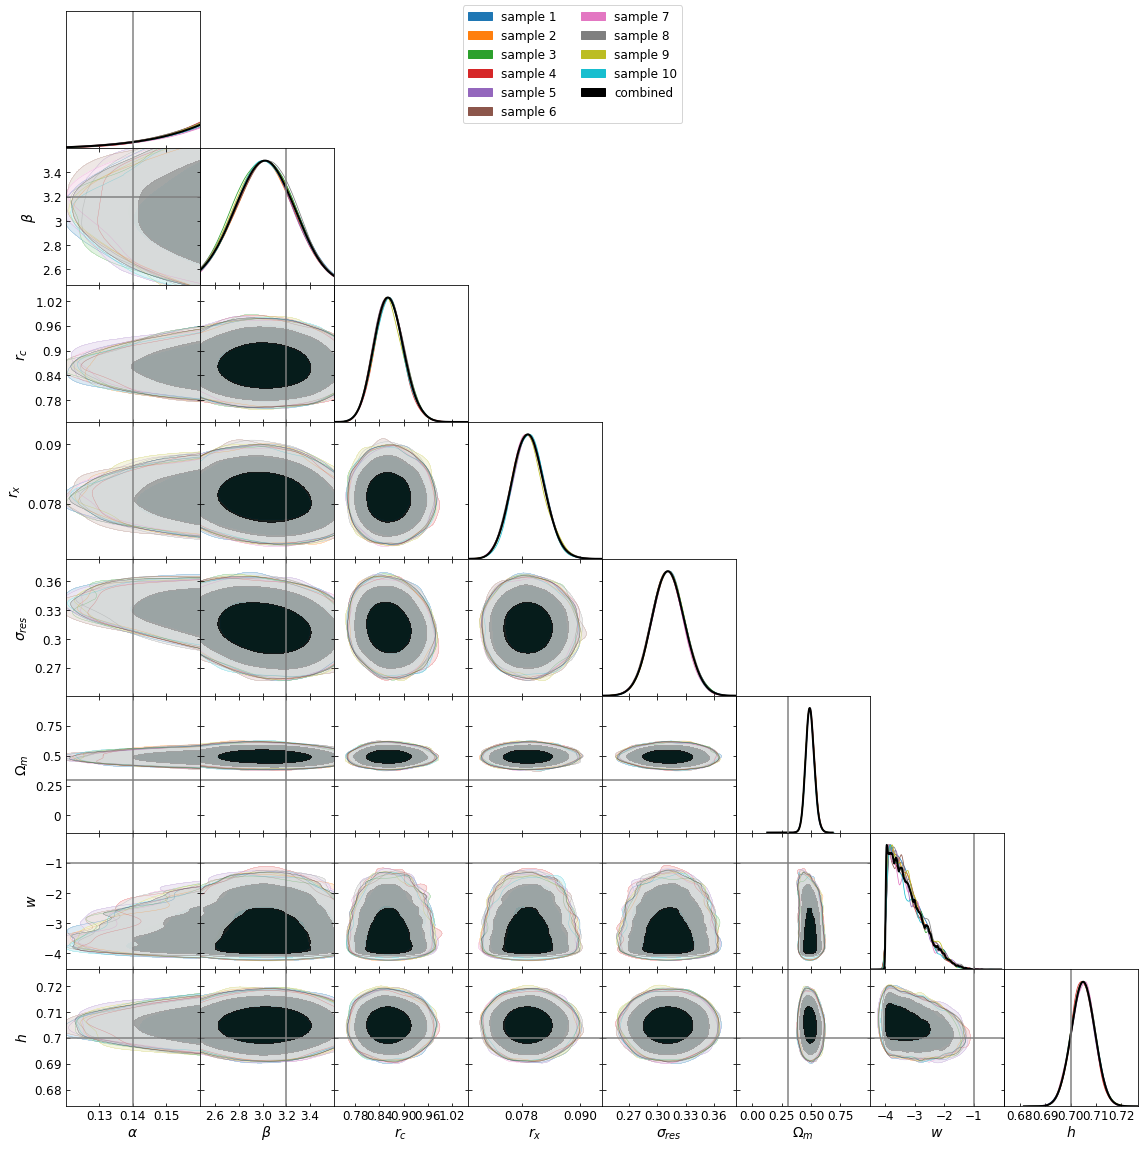

In [24]:
plotter = pt.getSubplotPlotter()
plotter.settings.num_plot_contours = 3
plotter.settings.rcSizes(12, 14, 12)

plotter.triangle_plot(mcsamples, filled=True, 
                      legend_labels=legend_labels, legend_ncol=2,
                      contour_args=contour_args, line_args=line_args,
                      param_limits=param_plot_limits)

# draw true value lines
for i in range(len(plotter.subplots)):
    for j in range(len(plotter.subplots[i])):
        subplot = plotter.subplots[i][j]
        if subplot is not None:
            if i > j: # only draw horizontal line for 2D plots
                subplot.axhline(param_true_values[params_of_interest[i]], color='gray')
            subplot.axvline(param_true_values[params_of_interest[j]], color='gray')

#plt.savefig('/home/tmakinen/repositories/BAHAMAS/plots/{}.png'.format(job_id), dpi=50)